In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygmt
from os.path import join
import obspy
%matplotlib inline

In [2]:
def read_pickle(fname):
    result=None
    with open(fname,"rb") as f:
        result=pickle.load(f)
    return result

# 10s case

In [3]:
windows_10s=read_pickle("./preprocessed_10s_to_120s.pkl")

In [4]:
windows_10s_keys=sorted(windows_10s.keys())

In [5]:
df = pd.DataFrame(columns=['gcmtid',"lon","lat","dep","mag","half_duration_time", "win_num","station_num","win_len"])

In [6]:
cmts_path="/Users/ziyixi/work/seismic-code/fwi-script/visualize/data/cmts"
cmts=obspy.read_events(join(cmts_path,"*"))
info_mapper={}
for each_cmt in cmts:
    lon=each_cmt.origins[0].longitude
    lat=each_cmt.origins[0].latitude
    dep=each_cmt.origins[0].depth/1000
    half_duration=each_cmt.focal_mechanisms[0].moment_tensor.source_time_function.duration
    mag=each_cmt.magnitudes[0].mag
    gcmtid=each_cmt.origins[0].resource_id.id.split("/")[-2]
    info_mapper[gcmtid]=(lon,lat,dep,half_duration,mag)

In [7]:
for index in range(len(windows_10s_keys)):
    wins=windows_10s[windows_10s_keys[index]]
    num_z=0
    num_r=0
    num_t=0
    len_z=0
    len_r=0
    len_t=0
    
    gcmtid=windows_10s_keys[index]
    lon,lat,dep,half_duration,mag=info_mapper[gcmtid]
    staton_num=0
    for stname in wins:
        staton_num+=1
        wins_st=wins[stname]
        for level1_list in wins_st:
            for level2_list in level1_list:
                thewin=level2_list
                component=thewin.channel_id.split(".")[-1]
                if(component[-1]=="R"):
                    num_r+=1
                    len_r+=(thewin.right-thewin.left)
                elif(component[-1]=="Z"):
                    num_z+=1
                    len_z+=(thewin.right-thewin.left)
                elif(component[-1]=="T"):
                    num_t+=1
                    len_t+=(thewin.right-thewin.left)
                else:
                    raise Exception(f"error in {windows_10s_keys[index]} {stname} {component}")
    #['gcmtid',"lon","lat","dep","mag","half_duration_time", "win_num","station_num","win_len"]
    df.loc[index] = [gcmtid,lon,lat,dep,mag,half_duration,num_z+num_r+num_t,staton_num,len_z+len_r+len_t]

In [8]:
df

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,200708010815A,136.5974,33.8399,372.2754,5.41,2.6,955,404,541409
1,200708020237A,141.8059,46.8397,3.0830,6.14,6.0,4372,519,2883937
2,200708220726A,140.7738,42.0852,123.3051,5.56,3.0,1141,236,680085
3,200709031614A,150.3140,45.7699,97.5065,6.18,6.0,1742,188,1067497
4,200709061751A,122.3377,24.2287,54.6895,6.23,6.4,4233,512,2865040
5,200710061238A,147.4461,18.8400,34.1462,6.05,5.2,3530,617,2222953
6,200710081710A,146.9502,43.4511,39.2769,5.67,3.4,3547,597,2280287
7,200710251350A,154.3330,45.8820,30.8931,6.06,5.4,985,128,614277
8,200711270427A,119.7742,16.2345,40.3165,5.87,4.2,3038,618,2079611
9,200712070047A,141.2400,30.0200,83.0805,5.85,4.2,1656,299,1064484


In [9]:
df=df.sort_values(by=['win_num'],ascending=False)
df=df.reset_index(drop=True)

In [10]:
df

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201601300325A,158.7300,53.8600,168.0700,7.22,20.0,13361,1024,9094495
1,201106222150A,142.5100,39.9900,41.3500,6.73,11.2,10092,1028,7300240
2,201310010338A,152.8100,53.2000,585.5200,6.72,11.2,9515,1014,6093960
3,201608241034A,94.5800,20.7900,88.3200,6.76,11.6,9141,1025,6238955
4,201208140259A,145.7000,49.9700,598.2000,7.72,35.6,8809,910,8368004
5,200908091055A,138.1900,33.0500,301.7700,7.06,16.6,8767,907,5741343
6,201305140032A,145.3500,18.6700,604.7200,6.82,12.6,8695,887,5607289
7,201007232208A,123.5900,6.5400,596.7500,7.31,22.0,8556,976,6323059
8,201007232251A,123.9000,6.6200,576.9200,7.64,32.4,8544,976,7579745
9,201007290731A,123.4100,6.6900,614.0200,6.61,9.8,8523,970,5277390


In [11]:
df_0_70=df[df.dep<=70].reset_index(drop=True)

In [12]:
df_0_70

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201106222150A,142.5100,39.9900,41.3500,6.73,11.2,10092,1028,7300240
1,201003140808A,141.9530,37.7053,42.3159,6.53,9.0,8289,886,5845265
2,201007042155A,142.7700,39.6800,35.3000,6.27,6.8,7858,877,5252975
3,201507030643A,126.2500,10.0800,43.8300,6.11,5.6,7675,1032,5237344
4,201004132349A,96.7875,33.0507,10.7442,6.82,13.2,7422,845,4894509
5,201111241025A,142.9400,41.7900,43.4600,6.16,5.8,7314,902,4947057
6,201002262031A,128.6128,25.8639,15.4527,6.99,14.8,7278,903,5384964
7,201005260853A,130.0029,25.8017,6.9811,6.46,8.0,7039,895,4550166
8,201707060803A,124.6800,11.1500,12.0000,6.48,8.4,6743,986,4334217
9,200806132343A,140.8500,39.0300,7.8129,6.86,13.4,6704,736,4681579


In [13]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"winnum_0_70.dat"),"w") as f:
    for index,row in df_0_70.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {row.win_num} \n")

In [14]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"gcmtid_0_70.dat"),"w") as f:
    for index,row in df_0_70.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {gcmtid} \n")

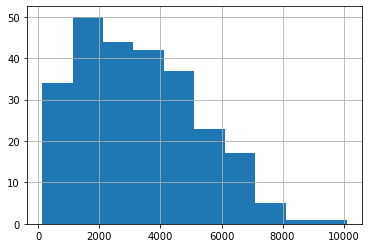

In [15]:
df_0_70.win_num.hist()

In [16]:
df_70_150=df[(df.dep>70)&(df.dep<=150)].reset_index(drop=True)

In [17]:
df_70_150

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201608241034A,94.5800,20.7900,88.3200,6.76,11.6,9141,1025,6238955
1,201005311951A,93.7079,11.1657,120.8399,6.46,8.4,8135,773,4964321
2,201302021417A,143.2400,42.8500,105.3500,6.93,14.2,7541,893,5018867
3,201102041353A,94.6800,24.4600,102.1204,6.24,6.6,6301,759,3702940
4,201206092100A,122.2000,24.4800,80.9900,5.88,4.2,6208,902,4191194
5,201104160111A,123.9800,25.3000,138.0800,5.79,3.8,5974,1014,3646408
6,201005031027A,141.2828,29.5795,94.0445,6.06,5.4,5911,811,3653618
7,200807231526A,141.5100,39.7300,98.8200,6.78,12.2,5824,626,3941277
8,201310061638A,141.7200,12.1400,115.6400,6.04,5.0,5819,999,3461841
9,201105221642A,120.6800,13.6700,127.7000,5.67,3.4,5672,1018,3628336


In [18]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"winnum_70_150.dat"),"w") as f:
    for index,row in df_70_150.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {row.win_num} \n")

In [19]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"gcmtid_70_150.dat"),"w") as f:
    for index,row in df_70_150.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {gcmtid} \n")

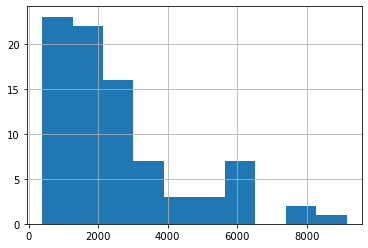

In [20]:
df_70_150.win_num.hist()

In [21]:
df_150_800=df[(df.dep>150)].reset_index(drop=True)

In [22]:
df_150_800

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201601300325A,158.7300,53.8600,168.0700,7.22,20.0,13361,1024,9094495
1,201310010338A,152.8100,53.2000,585.5200,6.72,11.2,9515,1014,6093960
2,201208140259A,145.7000,49.9700,598.2000,7.72,35.6,8809,910,8368004
3,200908091055A,138.1900,33.0500,301.7700,7.06,16.6,8767,907,5741343
4,201305140032A,145.3500,18.6700,604.7200,6.82,12.6,8695,887,5607289
5,201007232208A,123.5900,6.5400,596.7500,7.31,22.0,8556,976,6323059
6,201007232251A,123.9000,6.6200,576.9200,7.64,32.4,8544,976,7579745
7,201007290731A,123.4100,6.6900,614.0200,6.61,9.8,8523,970,5277390
8,201201010527A,138.1700,31.6100,351.9500,6.79,12.2,8374,925,5106909
9,201111080259A,125.7700,27.1300,230.6000,6.92,14.0,7629,902,4944050


In [23]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"winnum_150_800.dat"),"w") as f:
    for index,row in df_150_800.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {row.win_num} \n")

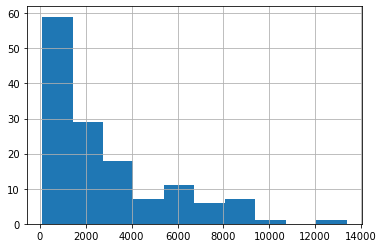

In [24]:
df_150_800.win_num.hist()

In [25]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"gcmtid_150_800.dat"),"w") as f:
    for index,row in df_150_800.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {gcmtid} \n")

In [26]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
df.to_csv(join(output_dir,"events.csv"), header=None, index=None, sep=' ', mode='w')

In [27]:
df_150_800

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201601300325A,158.7300,53.8600,168.0700,7.22,20.0,13361,1024,9094495
1,201310010338A,152.8100,53.2000,585.5200,6.72,11.2,9515,1014,6093960
2,201208140259A,145.7000,49.9700,598.2000,7.72,35.6,8809,910,8368004
3,200908091055A,138.1900,33.0500,301.7700,7.06,16.6,8767,907,5741343
4,201305140032A,145.3500,18.6700,604.7200,6.82,12.6,8695,887,5607289
5,201007232208A,123.5900,6.5400,596.7500,7.31,22.0,8556,976,6323059
6,201007232251A,123.9000,6.6200,576.9200,7.64,32.4,8544,976,7579745
7,201007290731A,123.4100,6.6900,614.0200,6.61,9.8,8523,970,5277390
8,201201010527A,138.1700,31.6100,351.9500,6.79,12.2,8374,925,5106909
9,201111080259A,125.7700,27.1300,230.6000,6.92,14.0,7629,902,4944050


In [28]:
df_150_800[df_150_800.win_num>2000]

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201601300325A,158.7300,53.8600,168.0700,7.22,20.0,13361,1024,9094495
1,201310010338A,152.8100,53.2000,585.5200,6.72,11.2,9515,1014,6093960
2,201208140259A,145.7000,49.9700,598.2000,7.72,35.6,8809,910,8368004
3,200908091055A,138.1900,33.0500,301.7700,7.06,16.6,8767,907,5741343
4,201305140032A,145.3500,18.6700,604.7200,6.82,12.6,8695,887,5607289
5,201007232208A,123.5900,6.5400,596.7500,7.31,22.0,8556,976,6323059
6,201007232251A,123.9000,6.6200,576.9200,7.64,32.4,8544,976,7579745
7,201007290731A,123.4100,6.6900,614.0200,6.61,9.8,8523,970,5277390
8,201201010527A,138.1700,31.6100,351.9500,6.79,12.2,8374,925,5106909
9,201111080259A,125.7700,27.1300,230.6000,6.92,14.0,7629,902,4944050


In [29]:
df_150_800[(df_150_800.half_duration_time<=10)&(df_150_800.win_num>=2000)].reset_index(drop=True)

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201007290731A,123.4100,6.6900,614.0200,6.61,9.8,8523,970,5277390
1,201506231218A,139.8500,27.6800,458.5100,6.52,8.8,7276,1017,4544083
2,201608041624A,141.9100,24.9800,522.7000,6.27,6.6,7151,1024,4465509
3,201309040018A,138.7900,30.0200,412.0300,6.51,8.8,6929,964,4169950
4,200904210526A,155.5900,50.6400,151.8400,6.19,6.0,6790,952,4099719
5,200909031326A,130.1828,31.0794,162.6043,6.17,6.0,6602,763,3955547
6,201309061133A,122.3100,20.2400,187.6800,5.97,4.8,6441,1014,3871499
7,201110210802A,142.5200,43.8300,191.4800,6.16,5.8,6119,911,3711208
8,201709071726A,139.7500,27.7900,459.7500,6.03,5.0,6083,1003,3753607
9,200910041058A,123.5606,6.7774,623.3777,6.60,10.0,5831,744,3359988


In [30]:
df_150_800.mag.min()

5.0499999999999998

In [31]:
df_70_150[(df_70_150.half_duration_time<=10)&(df_70_150.win_num>=2000)].reset_index(drop=True)

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201005311951A,93.7079,11.1657,120.8399,6.46,8.4,8135,773,4964321
1,201102041353A,94.6800,24.4600,102.1204,6.24,6.6,6301,759,3702940
2,201206092100A,122.2000,24.4800,80.9900,5.88,4.2,6208,902,4191194
3,201104160111A,123.9800,25.3000,138.0800,5.79,3.8,5974,1014,3646408
4,201005031027A,141.2828,29.5795,94.0445,6.06,5.4,5911,811,3653618
5,201310061638A,141.7200,12.1400,115.6400,6.04,5.0,5819,999,3461841
6,201105221642A,120.6800,13.6700,127.7000,5.67,3.4,5672,1018,3628336
7,201301090141A,94.9500,25.0900,105.9000,5.84,4.0,5617,890,3325234
8,200909031951A,94.7389,24.2893,103.5245,5.86,4.4,5455,745,3264226
9,201104160219A,140.0000,36.4000,80.5900,5.77,3.8,5372,1010,3463139


In [32]:
df_0_70[(df_0_70.half_duration_time<=10)&(df_0_70.win_num>=3000)].reset_index(drop=True)

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201003140808A,141.9530,37.7053,42.3159,6.53,9.0,8289,886,5845265
1,201007042155A,142.7700,39.6800,35.3000,6.27,6.8,7858,877,5252975
2,201507030643A,126.2500,10.0800,43.8300,6.11,5.6,7675,1032,5237344
3,201111241025A,142.9400,41.7900,43.4600,6.16,5.8,7314,902,4947057
4,201005260853A,130.0029,25.8017,6.9811,6.46,8.0,7039,895,4550166
5,201707060803A,124.6800,11.1500,12.0000,6.48,8.4,6743,986,4334217
6,200908122248A,140.6665,32.7502,54.7297,6.56,9.6,6693,772,4742108
7,201304171203A,141.7000,38.5100,55.9000,5.93,4.4,6677,911,4607339
8,201506080601A,142.2400,41.4900,54.0300,6.06,5.2,6663,1031,4535936
9,201006180223A,148.9179,44.3406,29.2744,6.17,5.8,6529,836,4308179


## kmeans 49/120

In [47]:
from sklearn.cluster import KMeans
import numpy as np
df_0_70_selected_120=df_0_70[(df_0_70.half_duration_time<=10)&(df_0_70.win_num>=3000)].reset_index(drop=True)

In [48]:
events_location=df_0_70_selected_120.values[:,1:3]

In [49]:
kmeans = KMeans(n_clusters=49, random_state=0,copy_x=True).fit(events_location)

In [50]:
kmeans.cluster_centers_ 

array([[ 129.09266   ,   27.3259    ],
       [  95.75985   ,   37.57665   ],
       [ 148.16884   ,   44.05996   ],
       [ 124.027925  ,   23.28035   ],
       [ 139.278225  ,   36.056725  ],
       [  97.69556667,   23.6705    ],
       [ 146.65      ,   13.66      ],
       [ 125.47      ,   10.35666667],
       [ 123.7588    ,   54.1686    ],
       [ 106.39      ,   39.74      ],
       [  92.25033333,   11.6846    ],
       [ 163.56      ,   55.74      ],
       [ 104.0117    ,   51.7641    ],
       [ 143.132975  ,   26.741675  ],
       [ 142.58921818,   37.84934545],
       [  92.89      ,   32.37      ],
       [ 141.8059    ,   46.8397    ],
       [ 131.12      ,   33.        ],
       [ 103.12      ,   30.22      ],
       [ 140.97505   ,   11.1627    ],
       [ 157.71      ,   50.61      ],
       [ 121.30424   ,   19.62374   ],
       [ 119.9914    ,   14.66483333],
       [  94.45      ,   25.4       ],
       [ 124.2921    ,    6.72745   ],
       [ 142.19885   ,   

In [51]:
pd_select_bool_list=np.zeros(120,dtype=np.bool)
for row in kmeans.cluster_centers_:
    lon=row[0]
    lat=row[1]
    distance=(events_location[:,0]-lon)**2+(events_location[:,1]-lat)**2
    index=np.argmin(distance)
    pd_select_bool_list[index]=True
df_0_70_selected_49=df_0_70_selected_120[pd_select_bool_list].reset_index(drop=True)

In [58]:
df_150_800_selected_51=df_150_800[(df_150_800.half_duration_time<=10)&(df_150_800.win_num>=2000)].reset_index(drop=True)

In [59]:
df_70_150_selected_40=df_70_150[(df_70_150.half_duration_time<=10)&(df_70_150.win_num>=2000)].reset_index(drop=True)

In [60]:
simulation_dataset=df_0_70_selected_49.append([df_70_150_selected_40,df_150_800_selected_51])

In [62]:
simulation_dataset=simulation_dataset.reset_index(drop=True)

In [64]:
simulation_dataset=simulation_dataset.sort_values(by=['win_num'],ascending=False)

In [65]:
simulation_dataset

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
89,201007290731A,123.4100,6.6900,614.0200,6.61,9.8,8523,970,5277390
49,201005311951A,93.7079,11.1657,120.8399,6.46,8.4,8135,773,4964321
0,201111241025A,142.9400,41.7900,43.4600,6.16,5.8,7314,902,4947057
90,201506231218A,139.8500,27.6800,458.5100,6.52,8.8,7276,1017,4544083
91,201608041624A,141.9100,24.9800,522.7000,6.27,6.6,7151,1024,4465509
92,201309040018A,138.7900,30.0200,412.0300,6.51,8.8,6929,964,4169950
93,200904210526A,155.5900,50.6400,151.8400,6.19,6.0,6790,952,4099719
94,200909031326A,130.1828,31.0794,162.6043,6.17,6.0,6602,763,3955547
95,201309061133A,122.3100,20.2400,187.6800,5.97,4.8,6441,1014,3871499
50,201102041353A,94.6800,24.4600,102.1204,6.24,6.6,6301,759,3702940


In [87]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"simulation_dataset.dat"),"w") as f:
    for index,row in simulation_dataset.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {row.win_num} \n")

In [88]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"gcmtid_simulation_dataset.dat"),"w") as f:
    for index,row in simulation_dataset.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {gcmtid} \n")

In [89]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/select_simulation_events/data"
with open(join(output_dir,"dep_simulation_dataset.dat"),"w") as f:
    for index,row in simulation_dataset.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep,_,_=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {dep} \n")

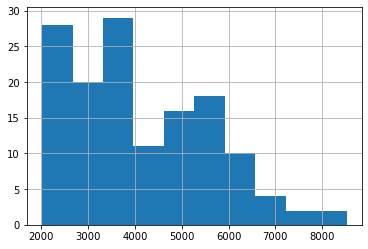

In [68]:
simulation_dataset.win_num.hist()

## get rid of some events according to email in 08/22.

In [71]:
simulation_dataset=simulation_dataset.reset_index(drop=True)

In [84]:
remove_list=[
    "201805101802A",
    "200910041058A",
    "201007290731A",
    "201007240535A",
    "200909181153A",
    "201608060908A",
    "201002260837A",
    "200908122004A",
    "200810230921A",
    "200905291951A",
    "200812250320A",
    "200906140558A",
    "200808100820A",
    "201005311951A",
    "201311232330A",
    "201211020152A"
]

In [85]:
for item in remove_list:
    simulation_dataset=simulation_dataset[simulation_dataset.gcmtid!=item].reset_index(drop=True)

In [86]:
simulation_dataset

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201111241025A,142.9400,41.7900,43.4600,6.16,5.8,7314,902,4947057
1,201506231218A,139.8500,27.6800,458.5100,6.52,8.8,7276,1017,4544083
2,201608041624A,141.9100,24.9800,522.7000,6.27,6.6,7151,1024,4465509
3,201309040018A,138.7900,30.0200,412.0300,6.51,8.8,6929,964,4169950
4,200904210526A,155.5900,50.6400,151.8400,6.19,6.0,6790,952,4099719
5,200909031326A,130.1828,31.0794,162.6043,6.17,6.0,6602,763,3955547
6,201309061133A,122.3100,20.2400,187.6800,5.97,4.8,6441,1014,3871499
7,201102041353A,94.6800,24.4600,102.1204,6.24,6.6,6301,759,3702940
8,201304200002A,103.1200,30.2200,21.8700,6.61,9.8,6278,899,4143114
9,200910031736A,121.5996,23.5823,31.7907,5.92,4.6,6261,874,3861581


In [135]:
simulation_dataset[simulation_dataset.gcmtid=="200901262130A"]

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
77,200901262130A,120.6441,57.4874,4.3615,5.36,2.4,3391,738,2139974


In [134]:
df_0_70[df_0_70.gcmtid=="201103161712A"]

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
177,201103161712A,121.57,56.68,16.16,5.06,1.6,1950,993,1173483


In [145]:
append_events=[
    "201205031019A",
    "201107161838A",
    "200805202042A",
    "201003190930A",
    
]
may_append_events=[
    "201303290501A",
    "201112271521A",
    "201202260617A",
    "201103161712A",
    
]

final_append_events=[
    "201112271521A",
    "201202260617A",
    "201205031019A",
    "201107161838A",
    "200805202042A",
    "201003190930A"    
]

In [146]:
toshow=df_0_70[df_0_70.gcmtid=="201303290501B"]
# for gcmtid in append_events:
#     toshow=toshow.append(df_0_70[df_0_70.gcmtid==gcmtid])
# for gcmtid in may_append_events:
#     toshow=toshow.append(df_0_70[df_0_70.gcmtid==gcmtid])
for gcmtid in final_append_events:
    toshow=toshow.append(df_0_70[df_0_70.gcmtid==gcmtid])

In [147]:
toshow=toshow.reset_index(drop=True)

In [148]:
toshow

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201112271521A,95.9100,51.7800,14.3178,6.66,10.8,5662,743,3588961
1,201202260617A,96.0000,51.6900,20.4600,6.67,10.4,6500,914,4192913
2,201205031019A,98.5800,40.6600,17.4700,5.20,2.0,2747,897,1669715
3,201107161838A,108.4300,52.9300,24.0000,5.30,2.2,2646,1003,1613648
4,200805202042A,108.5373,53.3206,11.4748,5.23,2.2,2659,696,1589010
5,201003190930A,110.1933,54.5743,31.3833,5.24,2.2,2576,845,1575088


In [149]:
simulation_dataset=simulation_dataset.append(toshow)
simulation_dataset=simulation_dataset.sort_values(by=['win_num'],ascending=False)
simulation_dataset=simulation_dataset.reset_index(drop=True)

In [150]:
simulation_dataset

,gcmtid,lon,lat,dep,mag,half_duration_time,win_num,station_num,win_len
0,201111241025A,142.9400,41.7900,43.4600,6.16,5.8,7314,902,4947057
1,201506231218A,139.8500,27.6800,458.5100,6.52,8.8,7276,1017,4544083
2,201608041624A,141.9100,24.9800,522.7000,6.27,6.6,7151,1024,4465509
3,201309040018A,138.7900,30.0200,412.0300,6.51,8.8,6929,964,4169950
4,200904210526A,155.5900,50.6400,151.8400,6.19,6.0,6790,952,4099719
5,200909031326A,130.1828,31.0794,162.6043,6.17,6.0,6602,763,3955547
6,201202260617A,96.0000,51.6900,20.4600,6.67,10.4,6500,914,4192913
7,201309061133A,122.3100,20.2400,187.6800,5.97,4.8,6441,1014,3871499
8,201102041353A,94.6800,24.4600,102.1204,6.24,6.6,6301,759,3702940
9,201304200002A,103.1200,30.2200,21.8700,6.61,9.8,6278,899,4143114


In [152]:
import subprocess
from os.path import join
todir="/Users/ziyixi/work/Datas/simulation_cmts"

for index,row in simulation_dataset.iterrows():
    gcmtid=row.gcmtid
    frompath=join(cmts_path,gcmtid)
    topath=join(todir,gcmtid)
    command=f"cp {frompath} {topath}"
    subprocess.call(command,shell=True)

In [156]:
simulation_dataset.dep

0       43.4600
1      458.5100
2      522.7000
3      412.0300
4      151.8400
5      162.6043
6       20.4600
7      187.6800
8      102.1204
9       21.8700
10      31.7907
11      12.4700
12      80.9900
13       8.8263
14     191.4800
15     459.7500
16     138.0800
17      94.0445
18     115.6400
19     390.3600
20      19.7529
21      12.0000
22     127.7000
23      14.3178
24     105.9000
25     571.8700
26      14.3100
27      20.0600
28     103.5245
29       8.5160
         ...   
100    454.6800
101    248.2800
102     11.4748
103     24.0000
104    587.4200
105    470.5500
106    201.7951
107    126.8200
108    389.9900
109     31.3833
110    236.0000
111    114.9429
112    439.6100
113    389.2900
114    145.1055
115     71.7100
116    107.6200
117     70.6988
118    491.1100
119    170.8200
120    393.7700
121    102.0800
122    177.4300
123    136.3100
124     99.3705
125     97.0800
126    504.1100
127    408.8400
128    111.7700
129    120.1674
Name: dep, Length: 130, 